## Generative Art: Long exposure effect with averaging frames
### پی‌آورد فرانهادِ درازان، با میانگین‌گیری کالبدها
By Hamed Shah-Hosseini
<br>The whole code:
    https://github.com/ostad-ai/Generative-Art

In [1]:
import cv2
import requests

In [2]:
#-----loading the video from Internet
image_local_path='./river-flowing.mp4'
image_internet_path='https://raw.githubusercontent.com/ostad-ai/Generative-Art/main/Media/river-flowing.mp4'
with open(image_local_path,'wb') as file:    
    file.write(requests.get(image_internet_path).content)

In [3]:
#----using running average to get local average of every few frames
#getting handle of the video
cap=cv2.VideoCapture(image_local_path)
cap2=cv2.VideoCapture(image_local_path)
# print('# FPS: ',cap.get(cv2.CAP_PROP_FPS))
# print('number of frames: ',int(cap.get(cv2.CAP_PROP_FRAME_COUNT)))
# print('width: ',cap.get(cv2.CAP_PROP_FRAME_WIDTH))
# print('height: ',cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
# FPS = frame per seconds
FPS=cap.get(cv2.CAP_PROP_FPS)
width=int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height=int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('./long-exposure.mp4', fourcc, FPS, (width,height))
#---------
#must be smaller than the number of frames
ave_window_size=10 #every ave_wind_size frames are averaged
i=0
while True:
    ret,frame=cap.read()
    if ret:
        if i==0:
            average=frame.copy().astype('float')
            print('Start processing....')
        else:
            b=frame[...,0].astype('float') # cv2.split() is possible but is costly
            g=frame[...,1].astype('float')
            r=frame[...,2].astype('float')
            if i>=ave_window_size:
                result=cv2.merge([average[...,0].astype('uint8'),
                  average[...,1].astype('uint8'),average[...,2].astype('uint8')])
                out.write(result)
                ret2,frame2=cap2.read()
                b2=frame2[...,0].astype('float') # cv2.split() is possible but is costly
                g2=frame2[...,1].astype('float')
                r2=frame2[...,2].astype('float')
                average[...,0]=(ave_window_size*average[...,0]-b2)/(ave_window_size-1.)
                average[...,1]=(ave_window_size*average[...,1]-g2)/(ave_window_size-1.)
                average[...,2]=(ave_window_size*average[...,2]-r2)/(ave_window_size-1.)
                #----------------           
                average[...,0]=((ave_window_size-1)*average[...,0]+b)/ave_window_size
                average[...,1]=((ave_window_size-1)*average[...,1]+g)/ave_window_size
                average[...,2]=((ave_window_size-1)*average[...,2]+r)/ave_window_size
            else:
                average[...,0]=(i*average[...,0]+b)/(i+1)
                average[...,1]=(i*average[...,1]+g)/(i+1)
                average[...,2]=(i*average[...,2]+r)/(i+1)
            
        i+=1
    else:
        print('Finished!')
        break    
out.release()
cap.release()
cv2.destroyAllWindows()

Start processing....
Finished!


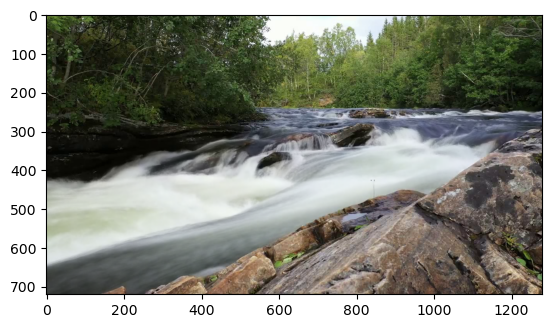

In [4]:
#--This is the last frame of output video: 'long-exposure.mp4'
from matplotlib import pyplot as plt
plt.imshow(average[...,::-1].astype(int))
plt.show()